# Loading Data

The first step is to load all of the required libraries

In [2]:
# Import libraries for use on .wav files
import wave
import struct

# Import libraries for file management, locating and loading data.
import fnmatch
import os

# Pandas for data storage during processing
import pandas as pd

# location of the samples to be used
directory = './heartbeat-sounds/set_b/'

Next iterate over the files in the selected location an load the normal heartbeat data
displaying the name of each file as its loaded to check against the files in the location

In [3]:
# Instatiate a dataframe to store multiple samples
normal_df = pd.DataFrame()

# iterate over all of the files in the specified folder and 
# load the normal data set
for filename in os.listdir(directory):
    if filename.endswith(".wav") and fnmatch.fnmatch(filename, '*normal__*'):
        # Get full filename by concatenating the path and filename, print out to indicate file will be loaded
        FNAME = os.path.join(directory, filename)
        print(FNAME)
        
        # Load file and unpack the samples
        f = wave.open(FNAME)
        frames = f.readframes(-1)
        samples = struct.unpack('h'*f.getnframes(), frames)
               
        # convert the samples to a list and then store in the dataframe
        temp_df = pd.DataFrame(list(samples))
        normal_df = normal_df.append(temp_df.T,ignore_index=True)
        
        continue
    else:
        # ignore files that do not match specified criteria
        continue

./heartbeat-sounds/set_b/normal__103_1305031931979_B.wav
./heartbeat-sounds/set_b/normal__103_1305031931979_D1.wav
./heartbeat-sounds/set_b/normal__103_1305031931979_D2.wav
./heartbeat-sounds/set_b/normal__103_1305031931979_D3.wav
./heartbeat-sounds/set_b/normal__106_1306776721273_B1.wav
./heartbeat-sounds/set_b/normal__106_1306776721273_C1.wav
./heartbeat-sounds/set_b/normal__106_1306776721273_C2.wav
./heartbeat-sounds/set_b/normal__106_1306776721273_D1.wav
./heartbeat-sounds/set_b/normal__106_1306776721273_D2.wav
./heartbeat-sounds/set_b/normal__107_1305654946865_C1.wav
./heartbeat-sounds/set_b/normal__109_1305653646620_C.wav
./heartbeat-sounds/set_b/normal__113_1306244002866_D.wav
./heartbeat-sounds/set_b/normal__115_1306259437619_C.wav
./heartbeat-sounds/set_b/normal__117_1306262456650_B.wav
./heartbeat-sounds/set_b/normal__125_1306332456645_B.wav
./heartbeat-sounds/set_b/normal__126_1306777102824_B.wav
./heartbeat-sounds/set_b/normal__126_1306777102824_C.wav
./heartbeat-sounds/set

Now I can have a look at the data, this shows that 200 samples have been loaded.
It also shows that the samples are of varying length with the longest 58720 data points, however there are alot of NaN values in the later columns

In [4]:
normal_df

,0,1,2,3,4,5,6,7,8,9,...,58710,58711,58712,58713,58714,58715,58716,58717,58718,58719
0,-1212,-1212,-1199,-783,-464,-533,-772,-638,-331,-292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2137,2010,2043,2363,2332,2353,2560,2672,2495,2225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,243,269,170,37,124,163,115,187,83,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,579,528,444,333,244,163,203,115,-25,-77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-124,50,266,12,46,61,-118,-87,43,192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,419,339,474,595,276,502,613,486,544,631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,791,967,1081,1106,1516,1477,1197,1483,1270,1086,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-636,-650,-313,-150,-546,-746,-792,-1051,-1059,-839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1958,2044,2300,2225,2173,2270,2050,1695,1394,1135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-26,50,3,-78,152,107,-10,154,161,153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Repeat the same steps for the murmur data

In [5]:
# Instatiate a dataframe to store multiple samples
murmur_df = pd.DataFrame()
# iterate over all of the files in the specified folder and 
# load the murmur data set
for filename in os.listdir(directory):
    if filename.endswith(".wav") and fnmatch.fnmatch(filename, '*murmur__*'):
        # Get full filename by concatenating the path and filename, print out to indicate file will be loaded
        FNAME = os.path.join(directory, filename)
        print(FNAME)
        
        # Load file and unpack the samples
        f = wave.open(FNAME)
        frames = f.readframes(-1)
        samples = struct.unpack('h'*f.getnframes(), frames)
        
        # convert the samples to a list and then store in the dataframe
        temp_df = pd.DataFrame(list(samples))
        murmur_df = murmur_df.append(temp_df.T,ignore_index=True)
        continue
    else:
        # ignore files that do not match specified criteria
        continue

./heartbeat-sounds/set_b/murmur__112_1306243000964_A.wav
./heartbeat-sounds/set_b/murmur__112_1306243000964_B.wav
./heartbeat-sounds/set_b/murmur__112_1306243000964_D.wav
./heartbeat-sounds/set_b/murmur__116_1306258689913_A.wav
./heartbeat-sounds/set_b/murmur__116_1306258689913_C.wav
./heartbeat-sounds/set_b/murmur__116_1306258689913_D.wav
./heartbeat-sounds/set_b/murmur__122_1306325762831_C.wav
./heartbeat-sounds/set_b/murmur__122_1306325762831_D.wav
./heartbeat-sounds/set_b/murmur__156_1306936373241_B.wav
./heartbeat-sounds/set_b/murmur__160_1307100683334_A.wav
./heartbeat-sounds/set_b/murmur__160_1307100683334_B.wav
./heartbeat-sounds/set_b/murmur__161_1307101199321_A.wav
./heartbeat-sounds/set_b/murmur__162_1307101835989_A.wav
./heartbeat-sounds/set_b/murmur__162_1307101835989_B.wav
./heartbeat-sounds/set_b/murmur__164_1307106095995_B.wav
./heartbeat-sounds/set_b/murmur__164_1307106095995_C.wav
./heartbeat-sounds/set_b/murmur__165_1307109069581_C.wav
./heartbeat-sounds/set_b/murmur

In [6]:
murmur_df

,0,1,2,3,4,5,6,7,8,9,...,96630,96631,96632,96633,96634,96635,96636,96637,96638,96639
0,934,782,697,582,659,815,883,855,802,830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,817,879,770,529,360,262,178,80,103,192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1733,2192,2593,2598,2300,1979,1676,1390,1052,721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-982,-973,-832,-813,-409,-231,-386,-231,17,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-18,78,42,142,234,-71,-47,60,-108,-70,...,95.0,-83.0,-42.0,-204.0,-189.0,-124.0,-110.0,-29.0,-86.0,-32.0
5,407,303,330,374,628,490,519,1058,857,846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-169,-137,-61,-101,-104,-84,-30,9,-144,-242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-4489,-3741,-2782,-1958,-1117,-247,425,893,1240,1495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1009,1037,1293,1475,1462,1358,1132,764,539,156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-3344,-3760,-4558,-4838,-6230,-7406,-4905,-2036,-2322,-2735,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In order to get a more accurate pca the data must be combined, I have the size of each set to seperate them again aferwards

In [7]:
AllData_df = pd.DataFrame(normal_df)
AllData_df = AllData_df.append(murmur_df,ignore_index=True)
print AllData_df

     0      1      2      3      4      5      6      7      8      9      \
0    -1212  -1212  -1199   -783   -464   -533   -772   -638   -331   -292   
1     2137   2010   2043   2363   2332   2353   2560   2672   2495   2225   
2      243    269    170     37    124    163    115    187     83      8   
3      579    528    444    333    244    163    203    115    -25    -77   
4     -124     50    266     12     46     61   -118    -87     43    192   
5      419    339    474    595    276    502    613    486    544    631   
6      791    967   1081   1106   1516   1477   1197   1483   1270   1086   
7     -636   -650   -313   -150   -546   -746   -792  -1051  -1059   -839   
8     1958   2044   2300   2225   2173   2270   2050   1695   1394   1135   
9      -26     50      3    -78    152    107    -10    154    161    153   
10      46    -35   -170   -104    -59     39    121    288    466    453   
11    -134   -278   -167   -144   -127   -174   -329   -277   -271   -389   

Check the sape of the combined data, has 200 + 66 = 266 rows
Print the head and tail of the new dataframe to check against the seperate frames and ensure the order is as expected

In [8]:
print AllData_df.shape

(266, 96640)


In [9]:
AllData_df.head()

,0,1,2,3,4,5,6,7,8,9,...,96630,96631,96632,96633,96634,96635,96636,96637,96638,96639
0,-1212,-1212,-1199,-783,-464,-533,-772,-638,-331,-292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2137,2010,2043,2363,2332,2353,2560,2672,2495,2225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,243,269,170,37,124,163,115,187,83,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,579,528,444,333,244,163,203,115,-25,-77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-124,50,266,12,46,61,-118,-87,43,192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
AllData_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,96630,96631,96632,96633,96634,96635,96636,96637,96638,96639
261,955,847,847,779,573,461,429,350,153,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,364,297,299,249,211,112,19,-26,-79,-154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,344,394,395,555,423,184,68,-64,-110,-122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,-74,30,130,36,134,176,198,262,207,363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,871,986,1070,1221,2216,2815,2414,2250,2489,2449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now I plot some of the data to be able to compare before and after filtering

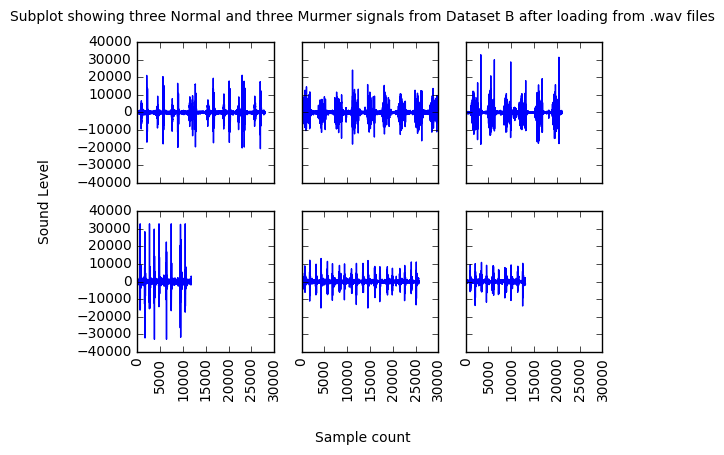

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 3)

for i in range(2): 
    for j in range(3): 
        ax[i][j].set_xlim(0, 30000)
        ax[i][j].set_ylim(-40000, 40000) 

plt.setp([a.get_xticklabels() for a in ax[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:, 1]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:, 2]], visible=False)
plt.setp([a.get_xticklabels() for a in ax[1, :]], rotation='vertical')

ax[0][0].plot(AllData_df.iloc[244])
ax[0][1].plot(AllData_df.iloc[243])
ax[0][2].plot(AllData_df.iloc[242])

ax[1][0].plot(AllData_df.iloc[24])
ax[1][1].plot(AllData_df.iloc[23])
ax[1][2].plot(AllData_df.iloc[22])

#plt.tight_layout()
#fig.savefig('Dataset B after Loading')

fig.text(0.5, -0.1, 'Sample count', ha='center')
fig.text(-0.04, 0.5, 'Sound Level', va='center', rotation='vertical')
fig.suptitle('Subplot showing three Normal and three Murmer signals from Dataset B after loading from .wav files')

plt.show()

The subplot shows the variation in length, to enure that as many of the samples can be used as possible and as PCA cannot be completed with NaN values some of the data is discarded. The number of samples is reduced to 5,000 which is equivalent to just over 0.1s at 44.1kHz sampling (44100 samples/sec). This means all of the smples other than 38 are free of NaN values and will be included in th PCA

In [12]:
reduced_df = pd.DataFrame()
y = pd.DataFrame()

y = AllData_df.T[:5000]
reduced_df = y.T

print reduced_df

        0        1        2       3        4        5        6        7     \
0    -1212.0  -1212.0  -1199.0  -783.0   -464.0   -533.0   -772.0   -638.0   
1     2137.0   2010.0   2043.0  2363.0   2332.0   2353.0   2560.0   2672.0   
2      243.0    269.0    170.0    37.0    124.0    163.0    115.0    187.0   
3      579.0    528.0    444.0   333.0    244.0    163.0    203.0    115.0   
4     -124.0     50.0    266.0    12.0     46.0     61.0   -118.0    -87.0   
5      419.0    339.0    474.0   595.0    276.0    502.0    613.0    486.0   
6      791.0    967.0   1081.0  1106.0   1516.0   1477.0   1197.0   1483.0   
7     -636.0   -650.0   -313.0  -150.0   -546.0   -746.0   -792.0  -1051.0   
8     1958.0   2044.0   2300.0  2225.0   2173.0   2270.0   2050.0   1695.0   
9      -26.0     50.0      3.0   -78.0    152.0    107.0    -10.0    154.0   
10      46.0    -35.0   -170.0  -104.0    -59.0     39.0    121.0    288.0   
11    -134.0   -278.0   -167.0  -144.0   -127.0   -174.0   -329.

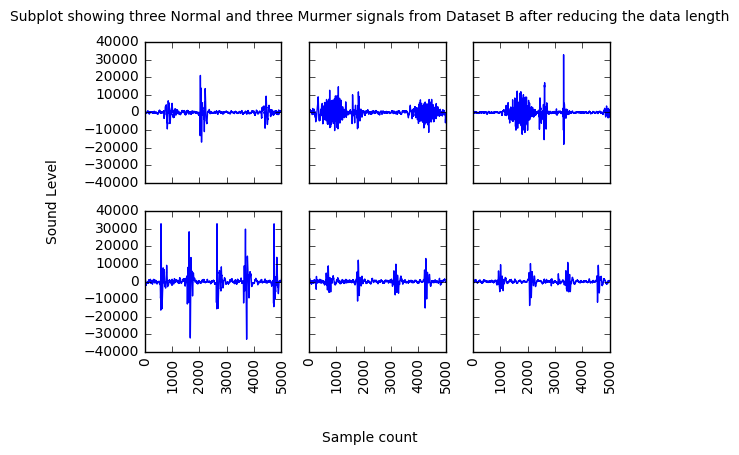

In [16]:
fig, ax = plt.subplots(2, 3)

for i in range(2): 
    for j in range(3): 
        ax[i][j].set_xlim(0, 5000)
        ax[i][j].set_ylim(-40000, 40000) 

plt.setp([a.get_xticklabels() for a in ax[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:, 1]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:, 2]], visible=False)
plt.setp([a.get_xticklabels() for a in ax[1, :]], rotation='vertical')

ax[0][0].plot(reduced_df.iloc[244])
ax[0][1].plot(reduced_df.iloc[243])
ax[0][2].plot(reduced_df.iloc[242])

ax[1][0].plot(reduced_df.iloc[24])
ax[1][1].plot(reduced_df.iloc[23])
ax[1][2].plot(reduced_df.iloc[22])

#plt.tight_layout()
#fig.savefig('Dataset B after Reducing Length')

fig.text(0.5, -0.1, 'Sample count', ha='center')
fig.text(-0.04, 0.5, 'Sound Level', va='center', rotation='vertical')
fig.suptitle('Subplot showing three Normal and three Murmer signals from Dataset B after reducing the data length')

plt.show()

Record the rows which still contain NaN values and must be dropped for PCA

In [17]:
temp_df = pd.DataFrame(reduced_df.T)

for i in range(265):
    if temp_df[i].isnull().values.any():
        print i
    else:
        continue

32
138
160
163
164
186
195
196
220


Remove Nan values and check the shape is 266 - 9 = 257 rows

In [18]:
reduced_df = reduced_df.dropna()
reduced_df.isnull().values.any()

False

In [19]:
print reduced_df.shape

(257, 5000)


In [20]:
print reduced_df

        0        1        2       3        4        5        6        7     \
0    -1212.0  -1212.0  -1199.0  -783.0   -464.0   -533.0   -772.0   -638.0   
1     2137.0   2010.0   2043.0  2363.0   2332.0   2353.0   2560.0   2672.0   
2      243.0    269.0    170.0    37.0    124.0    163.0    115.0    187.0   
3      579.0    528.0    444.0   333.0    244.0    163.0    203.0    115.0   
4     -124.0     50.0    266.0    12.0     46.0     61.0   -118.0    -87.0   
5      419.0    339.0    474.0   595.0    276.0    502.0    613.0    486.0   
6      791.0    967.0   1081.0  1106.0   1516.0   1477.0   1197.0   1483.0   
7     -636.0   -650.0   -313.0  -150.0   -546.0   -746.0   -792.0  -1051.0   
8     1958.0   2044.0   2300.0  2225.0   2173.0   2270.0   2050.0   1695.0   
9      -26.0     50.0      3.0   -78.0    152.0    107.0    -10.0    154.0   
10      46.0    -35.0   -170.0  -104.0    -59.0     39.0    121.0    288.0   
11    -134.0   -278.0   -167.0  -144.0   -127.0   -174.0   -329.

Load PCA from sklearn and create a model to recreate the signal with less than 95% variance. Fit the model to the reduced data

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(reduced_df)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Plot the results of the PCA using the same rows as previously for direct comparison, adjusting for the removed rows.

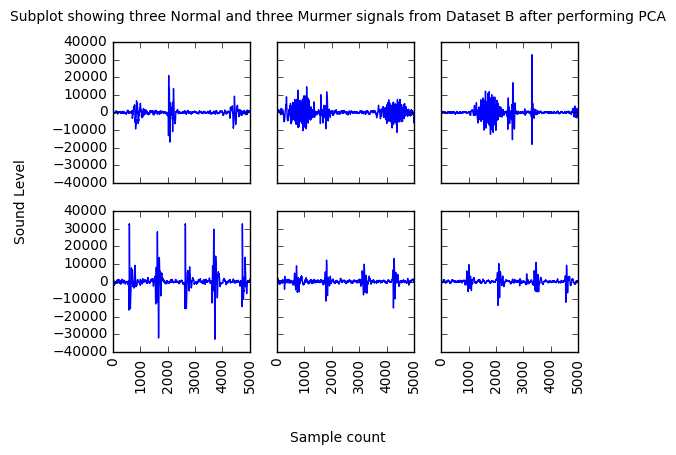

In [57]:
fig, ax = plt.subplots(2, 3)

for i in range(2): 
    for j in range(3): 
        ax[i][j].set_xlim(0, 5000)
        ax[i][j].set_ylim(-40000, 40000) 

plt.setp([a.get_xticklabels() for a in ax[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:, 1]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:, 2]], visible=False)
plt.setp([a.get_xticklabels() for a in ax[1, :]], rotation='vertical')

ax[0][0].plot(reduced_df.iloc[235])
ax[0][1].plot(reduced_df.iloc[234])
ax[0][2].plot(reduced_df.iloc[233])

ax[1][0].plot(reduced_df.iloc[24])
ax[1][1].plot(reduced_df.iloc[23])
ax[1][2].plot(reduced_df.iloc[22])

#plt.tight_layout()
#fig.savefig('Dataset B after PCA')

fig.text(0.5, -0.1, 'Sample count', ha='center')
fig.text(-0.04, 0.5, 'Sound Level', va='center', rotation='vertical')
fig.suptitle('Subplot showing three Normal and three Murmer signals from Dataset B after performing PCA')


plt.show()

Load libries for filtering and add methods for creating filter and applying to the data

In [34]:
from scipy.signal import butter, lfilter, freqz
import numpy as np
import matplotlib.pyplot as plt
#from scipy.signal import signal

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

Plot various order filters to compare them before deciding the order to use

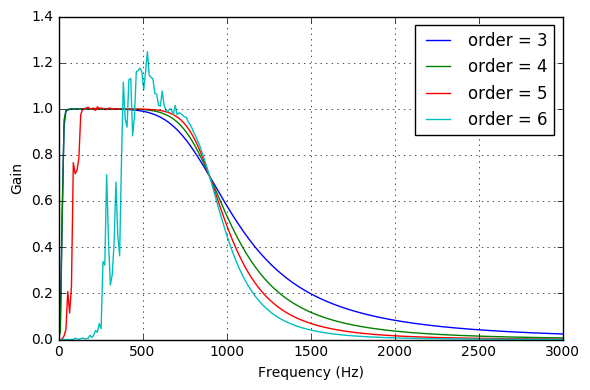

In [63]:
# Sample rate and desired cutoff frequencies (in Hz).
fs = 44100.0
lowcut = 25.0
highcut = 900.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3,4,5,6]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)


plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')
plt.xlim(0, 3000)

plt.tight_layout()
plt.savefig('Filter Selection')

plt.show()

Apply the filter to the data and print out to see ite effect

In [51]:
y = butter_bandpass_filter(reduced_df,lowcut, highcut, fs, order=4)

In [52]:
filtered_df = pd.DataFrame(y)
print filtered_df

         0         1          2          3           4           5     \
0   -0.015626 -0.135515  -0.590151  -1.757009   -4.088447   -8.016565   
1    0.027551  0.237302   1.027077   3.055939    7.175814   14.353063   
2    0.003133  0.027505   0.119987   0.353518    0.807003    1.548975   
3    0.007465  0.064081   0.275223   0.806956    1.851662    3.590403   
4   -0.001599 -0.011621  -0.038156  -0.074832   -0.093651   -0.056641   
5    0.005402  0.045817   0.196875   0.587461    1.391852    2.809036   
6    0.010198  0.090711   0.406414   1.249935    3.025198    6.224608   
7   -0.008200 -0.071292  -0.306992  -0.892609   -2.018426   -3.866126   
8    0.025243  0.220034   0.966583   2.919025    6.937738   13.990542   
9   -0.000335 -0.001927  -0.004772  -0.007121   -0.007308   -0.000243   
10   0.000593  0.004099   0.011608   0.013248   -0.018339   -0.121082   
11  -0.001728 -0.016839  -0.079936  -0.252440   -0.611029   -1.233146   
12   0.001779  0.018382   0.092020   0.303735    0.

Re-print the subplots to show the filtering result for comparison

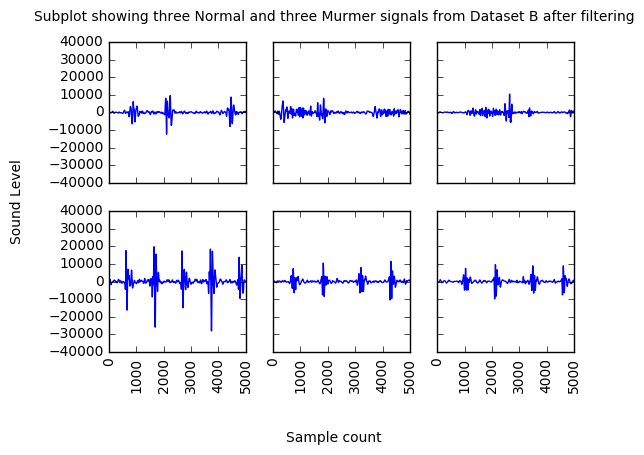

In [59]:
fig, ax = plt.subplots(2, 3)

for i in range(2): 
    for j in range(3): 
        ax[i][j].set_xlim(0, 5000)
        ax[i][j].set_ylim(-40000, 40000) 

plt.setp([a.get_xticklabels() for a in ax[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:, 1]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:, 2]], visible=False)
plt.setp([a.get_xticklabels() for a in ax[1, :]], rotation='vertical')

ax[0][0].plot(filtered_df.iloc[235])
ax[0][1].plot(filtered_df.iloc[234])
ax[0][2].plot(filtered_df.iloc[233])

ax[1][0].plot(filtered_df.iloc[24])
ax[1][1].plot(filtered_df.iloc[23])
ax[1][2].plot(filtered_df.iloc[22])

#plt.tight_layout()
#fig.savefig('Dataset B after Filtering')

fig.text(0.5, -0.1, 'Sample count', ha='center')
fig.text(-0.04, 0.5, 'Sound Level', va='center', rotation='vertical')
fig.suptitle('Subplot showing three Normal and three Murmer signals from Dataset B after filtering')


plt.show()

Produce a single plot of a Normal and Murmur sample to give a clearer comparison
This shows the difference with the Normal heartbeat having clear individual pulses and the murmur sample having an elongated pulse, described in the challenge as a whooshing noise

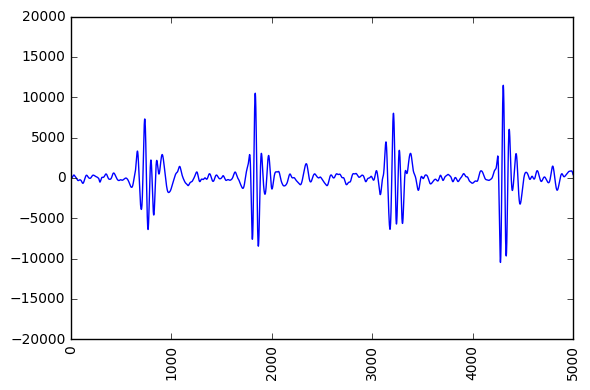

In [64]:
row = filtered_df.iloc[23]
row.plot()
plt.xticks(rotation='vertical')
plt.xlim(0, 5000)
plt.ylim(-20000, 20000) 


plt.tight_layout()
plt.savefig('Dataset B Normal after Filtering')

plt.show()

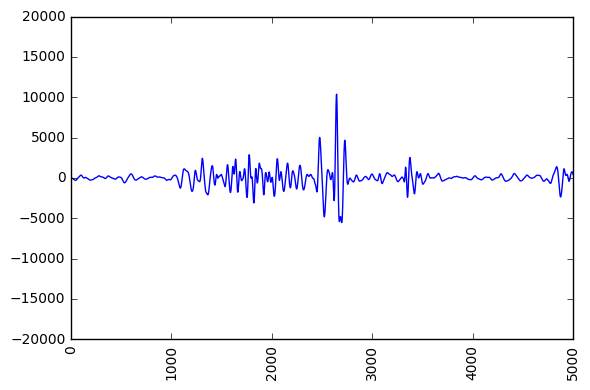

In [65]:
row = filtered_df.iloc[233]
row.plot()
plt.xticks(rotation='vertical')
plt.xlim(0, 5000)
plt.ylim(-20000, 20000) 

plt.tight_layout()
plt.savefig('Dataset B Murmur after Filtering')

plt.show()

Split the data back into Normal and Murmur, accounting for the 9 samples that were removed for the PCA

In [192]:
filtered__normal_df = pd.DataFrame(filtered_df[:192])
filtered__murmur_df = pd.DataFrame(filtered_df[192:])
print filtered__normal_df.shape
print filtered__murmur_df.shape

(192, 5000)
(65, 5000)
